In [1]:
# Importing the required libraries and ML models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Loading the dataset. The index_col and parse_dates are important as it is a time-series data.
df = pd.read_csv('AEP_hourly.csv.zip', index_col='Datetime', parse_dates=True)

# Selecting the AEP column as our primary focus and createing a copy of it.
# As this is our Target variable i.e. (Y)
data = df[['AEP_MW']].copy()

# Now displaying how the data looks after the above loading
print("--- Data Loaded Successfully ---")
print(data.head())
print("\n--- Data Info ---")
data.info()

--- Data Loaded Successfully ---
                      AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


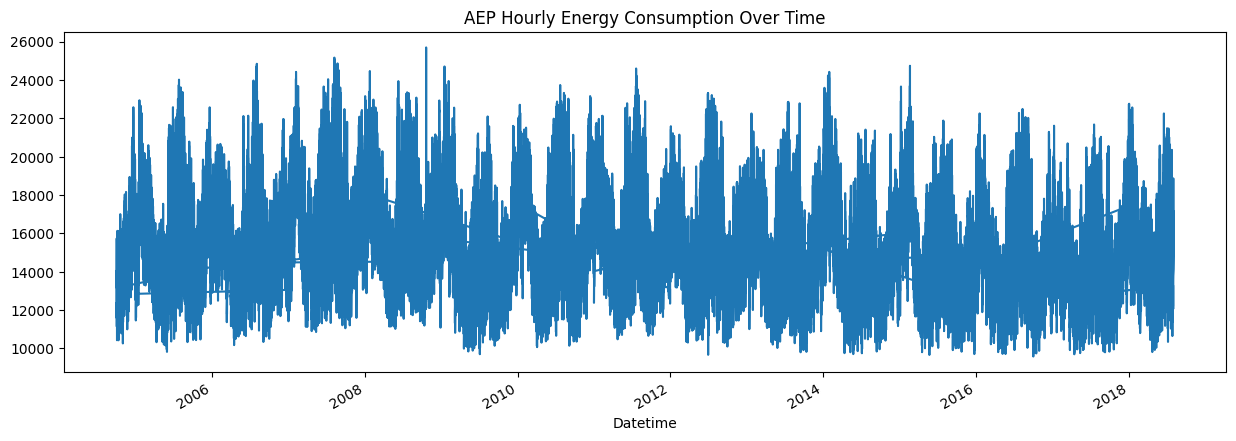

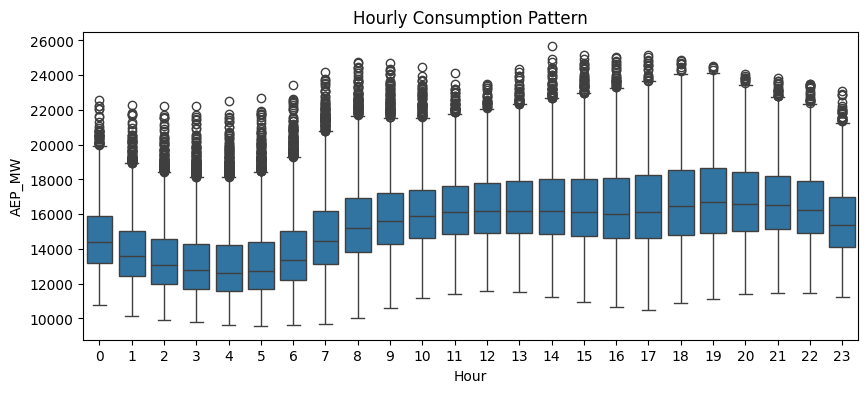


EDA Check: Patterns like daily spikes and seasonal trends are visible.


In [2]:
# Visualizing the entire time series

plt.figure(figsize=(15, 5))
data['AEP_MW'].plot(title='AEP Hourly Energy Consumption Over Time')
plt.show()

# Visualizing the seasonal trends like (Hourly pattern)
# createing a simple 'Hour' feature for this plot.

data['Hour'] = data.index.hour
plt.figure(figsize=(10, 4))
sns.boxplot(x='Hour', y='AEP_MW', data=data)
plt.title('Hourly Consumption Pattern')
plt.show()

# Cleaning up: removeing the temporary 'Hour' column as we will recreate features afterwards
data.drop(columns=['Hour'], inplace=True)

print("\nEDA Check: Patterns like daily spikes and seasonal trends are visible.")

In [3]:
#  PREPROCESSING THE DATA

# 1. Feature Engineering: Creating/defining the Simple Time-Based Features

def create_features(df):
    """Creates time-series features from the Datetime index."""
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['quarter'] = df.index.quarter
    return df

data = create_features(data)

# 2. Defineing Features (X) and Target (Y)
TARGET = 'AEP_MW'
FEATURES = ['hour', 'dayofweek', 'dayofyear', 'month', 'year', 'quarter']

X = data[FEATURES]
y = data[TARGET]

# We need data unique or diffrerent chunk of dataset for training and testing so
# 3. Split Data for Training and Testing (Time-Series Split)
# this means we will divide in two parts as per dates
# so older data for training and newer one for testing
# We'll use 80% for training and 20% for testing.

train_size = int(len(data) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print("Data successfully split chronologically.")
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

Data successfully split chronologically.
Train samples: 97018, Test samples: 24255


In [7]:
# checing our first 5 rows of the Training Features (X_train) (not necessary )
print("--- Preprocessed Features (X_train) Head ---")
print(X_train.head())

# Also check the last row to confirm the chronological split
print("\n--- X_train Last Row (End of Training Data) ---")
print(X_train.tail(1))

--- Preprocessed Features (X_train) Head ---
                     hour  dayofweek  dayofyear  month  year  quarter
Datetime                                                             
2004-12-31 01:00:00     1          4        366     12  2004        4
2004-12-31 02:00:00     2          4        366     12  2004        4
2004-12-31 03:00:00     3          4        366     12  2004        4
2004-12-31 04:00:00     4          4        366     12  2004        4
2004-12-31 05:00:00     5          4        366     12  2004        4

--- X_train Last Row (End of Training Data) ---
                     hour  dayofweek  dayofyear  month  year  quarter
Datetime                                                             
2015-03-07 08:00:00     8          5         66      3  2015        1
